# Pandas

Aqui vamos falar de uma biblioteca muito importante na análise e tratamento de dados!<br>
O Pandas permite converter aquelas matrizes/arrays de numpy, cheias de números e sem estética nenhuma, em uma tabela tabulada e organizada. Claro que ele não serve apenas para isso, ele permite a manipualção dessas mesmas matrizes de forma eficiente, permite aplicar cálculos, fórmulas, gráficos e até funções criadas por nós e que interagem com os dados!

## Como instalar

Assim como mostrei a instalação de [Numpy](https://github.com/TigaxMT/Apontamentos-Machine-Learning/tree/master/01.%20Numpy), aqui não mudará muito, apenas o nome do pacote:<br>
* Pip: `pip install pandas`
* Conda: `conda install pandas`

Use o comando que corresponde ao gestor de pacotes que você utiliza.<br><br>

**Nota**: Lembro, novamente, que é preferível, para utilizadores de distros Linux, utilizar o pip3 e no caso de dar algum erro com o pip, tente adicionar a flag: `--user` - depois do comando<br>

## Básico

Comecemos por importar o pandas

In [1]:
import pandas as pd

Assim como no numpy nós importámos o pandas e utilizando o: `as` - definimos um alias (um outro nome mais curto) para referir-nos ao pandas.<br><br>
Agora vamos criar um DataFrame, mas afinal o que é isso ??<br><br>
Bem um DataFrame é nada mais nada menos que a tabela tabulada e linda que falei acima! Nós podemos criar um array/matriz numpy e colocá-la em um DataFrame. Podemos pegar numa lista, num dicionário e colocá-lo num DataFrame.<br>
Essa é a beleza e a facilidade do pandas, e ainda só começámos!<br><br>
Antes de começar logo com um numpy array, deixem-me começar por definir um dicionário.

In [2]:
## Dicionário com uma lista de minutos de estudo de cada aluno por disciplina

dicionario = {
    "Matemática": [90, 180, 45, 360, 920, 15],
    "Física e Química": [70, 120, 160, 360, 420, 87],
    "Português": [610, 10, 32, 531,763, 234],
    "Inglês": [12, 812, 123, 321, 631, 34]
}

Como falei, decidi criar um dicionário. Nele temos, como chaves, as disciplinas e como valores, temos um lista de minutos de estudo de cada aluno, por dia.<br><br>
Agora vamos criar um **Pandas DataFrame** e passar o dicionário como o nosso input.

In [3]:
dataframe = pd.DataFrame(dicionario)

In [4]:
dataframe

,Matemática,Física e Química,Português,Inglês
0,90,70,610,12
1,180,120,10,812
2,45,160,32,123
3,360,360,531,321
4,920,420,763,631
5,15,87,234,34


E voilá, temos tabela!<br>
Como podemos observar as chaves do dicionário viraram colunas e o elemento N de cada lista fico em um linha da tabela ... Agora vocês perguntam-se:
*Mas que elemento N?! Não entendi ...*<br><br>
Vamos analisar as listas:<br>
[90, 180, 45, 360, 920, 15]<br>
[70, 120, 160, 360, 420, 87]<br>
[610, 10, 32, 531,763, 234]<br>
[12, 812, 123, 321, 631, 34]<br><br>
Reparem que todas as lista têm 6 elementos/números. Se eu pedir para dizerem-me o primeiro elemento de cada lista, ou seja, o elemento de índice 0, vocês diriam:<br>
***90, 70, 610 e 12***<br>
E estaria correto! Se eu dissesse o 4 elemento de cada lista, vocês diriam:
***360, 360, 763, 631***<br>
Esse é o N que falei acima, vocês pegaram o N elemento de cada lista. O Pandas faz exatamente isso e coloca numa linha da tabela.

## O que são aqueles número de 0 a 5 na esquerda da tabela ??

Bem esses número é o índice da nossa linha na tabela. Por exemplo, sabemos que a linha 3 tem os valores: 360, 360, 531, 321<br><br>
Eles podem ser úteis para localizar e alterar valores na tabela, mas isso falaremos mais à frente.

## E se passarmos só uma lista ou só um Numpy array ??

Vamos testar para ver o que acontece!

In [5]:
import numpy as np

matriz = np.array([
    [1,2,3,4],
    [5,6,7,8],
    [9, 10, 11, 12]
])

dataframe = pd.DataFrame(matriz)

dataframe

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


Funcionou! Porém o nome das nossas colunas ficaram com o índice das colunas no numpy array, dá para mudar isso ?<br>
A resposta é CLARO QUE SIM!

In [6]:
dataframe.columns = ["A", "B", "C", "D"]

In [7]:
dataframe

,A,B,C,D
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


Se atribuirmos ao atributo `columns`, uma lista com os nomes que queremos para cada coluna, podemos observar que funciona.<br>
Vamos testar passar apenas uma lista com 2 nomes(strings).

In [8]:
dataframe.columns = ["Test1", "Test2"]
dataframe

ValueError: Length mismatch: Expected axis has 4 elements, new values have 2 elements

Ups! Parece que temos que passar todos os nomes, ou talvez não ...

In [9]:
dataframe = dataframe.rename(columns={"B": "TesteB", "C": "TesteC"})

dataframe

,A,TesteB,TesteC,D
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


Bem parece que consegui renomear apenas as colunas "B" e "C" (nomeadas anteriormente), mas ainda há outra forma de aplicar isto.

In [10]:
dataframe.rename(columns={"A": "TesteA", "D": "TesteD"}, inplace=True)

dataframe

,TesteA,TesteB,TesteC,TesteD
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


Consegui modificar o nome da coluna "A" e "D" sem precisar atribuir o resultado ao nosso `dataframe` ! Como isso é possivel?!<br><br>
O truque é o parâmetro `inplace` que por defeito é definido como `False` mas se nós colocarmos como `True` ele atribui as modificações ao nosso dataframe sem a necessidade do: `dataframe = `<br><br>
Eu acho uma boa prática usar o `inplace` no lugar do `variavel = ` e ele está disponível na maioria dos métodos do pandas, então mais uma razão para utilizá-lo!

Podemos, também, definir o nome das colunas assim que criamos o dataframe

In [11]:
novo_dataframe = pd.DataFrame(matriz, columns=["TesteA", "TesteB", "TesteC", "TesteD"])

novo_dataframe

,TesteA,TesteB,TesteC,TesteD
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


É só utilizar o parâmetro `columns` e passar a lista com o NÚMERO CERTO de nomes para cada coluna.

## Carregar ficheiros num DataFrame

Sim, também é possível ler o seu ficheiro excel ou csv para um dataframe, basta usar o método `read_excel` ou `read_csv` 

In [12]:
excel_df = pd.read_excel("assets/teste.xlsx", header=None)

excel_df

,0,1,2,3
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


Criei um .xlsx (Ficheiro Excel) com uma sequência de 1 a 12 e carreguei-o com o método citado anteriormente.<br>
-*Mas porque usaste o parâmetro header?*<br><br>
Por defeito o `header = 0` - isso significa que os valores da linha índice 0 (1ª linha da tabela), serão utilizados como cabeçalho (nome das colunas). Como eu não pretendo isso, definiu como `None`.<br><br>
Agora vamos tentar carregar um ficheiro CSV (Comma-Separated Values)

In [13]:
csv_df = pd.read_csv("assets/teste2.csv")

csv_df

,A;B;C;D
0,1;2;3;4
1,5;6;7;8


Ele carregou certo o nome das colunas e os valores, mas porquê os ";" ??<br><br>
Este CSV não é separado por vírgula e sim por ponto e vírgula. Quando o CSV não é separado por vírgula, temos que especificar qual é o caracter separador e para isso usamos o `sep`.

In [14]:
csv_df = pd.read_csv("assets/teste2.csv", sep=";")

csv_df

,A,B,C,D
0,1,2,3,4
1,5,6,7,8


Agora já ficou bom! Outra coisa que não mostrei, mas pode ser útil, é que vocês podem especificar como os número decimais são mostrados.<br><br>
Se tiver no Brasil, por exemplo, números decimais serão mostrados com ponto("."), aqui vão alguns exemplos:<br>
1.13<br>
2643.761<br>
12.12<br><br>
Em Portugal é mais utilizado a vírgula(",") logo:<br>
1,13<br>
2643,761<br>
12,12<br><br>
Devido a essas diferenças, nós podemos especificar qual caracter é usado nos decimais. No caso de querer usar a "," passamos o parâmetro: `dec=","`

## Condições em DataFrames

Imaginemos que queremos ver só as linhas de uma dada tabela, onde os valores de uma dada coluna são = X<br><br>
Isto é possível de fazer com o Pandas e para demonstrar vou usar o nosso dicionário de horas diárias de estudo.

In [15]:
dicionario = {
    "Matemática": [90, 180, 45, 360, 920, 15],
    "Física e Química": [70, 120, 160, 360, 420, 87],
    "Português": [610, 10, 32, 531,763, 234],
    "Inglês": [12, 812, 123, 321, 631, 34]
}

df = pd.DataFrame(dicionario)

df

,Matemática,Física e Química,Português,Inglês
0,90,70,610,12
1,180,120,10,812
2,45,160,32,123
3,360,360,531,321
4,920,420,763,631
5,15,87,234,34


Suponhamos que eu só quero ver as horas de estudo de alunos que estudam pelo menos 80 minutos de Física e Química por dia.<br><br>
Bem este "pelo menos" pode ser traduzido num "maior ou igual a 80".

In [16]:
df["Física e Química"] >= 80

0    False
1     True
2     True
3     True
4     True
5     True
Name: Física e Química, dtype: bool

Bem parece que temos aqui um DataFrame booleano, onde apenas a 1ª linha tem o valor Falso. E se observarmos na tabela acima, apenas a 1ª linha estuda menos de 80 minutos por dia, portanto está certo!<br><br>
Mas nós não queremos um DataFrame booleano, nós queremos um DataFrame igual ao original só que apenas com os alunos que estudam 80 minutos ou mais de Física e Química por dia.

In [17]:
df[ df["Física e Química"] >= 80 ]

,Matemática,Física e Química,Português,Inglês
1,180,120,10,812
2,45,160,32,123
3,360,360,531,321
4,920,420,763,631
5,15,87,234,34


Voilá! Aqui temos o DataFrame que queriamos. Basicamente o que se passou aqui é que passamos o nosso DataFrame booleano (que nada mais é que um array, uma lista de valores: Verdadeiro/Falso) como índice do nosso DataFrame, e todos os índices onde o valor é True e ele mostra e tudo que é False ele omite.

*-É tudo muito bonito, mas e se quisermos fazer mais que uma condição?? Dá para fazer?*<br><br>
Sim, claro que dá, só temos que mudar um pouco a estrutura. Vamos agora querer não só alunos com 80 minutos ou mais de FQ, mas também vamos querer alunos com 90 ou mais minutos de Português.

In [18]:
df[ (df["Física e Química"] >= 80) & (df["Português"] >= 90)]

,Matemática,Física e Química,Português,Inglês
3,360,360,531,321
4,920,420,763,631
5,15,87,234,34


E cá temos eles! A única coisa que temos de fazer é envolver cada condição em: `()` - e usar o operador: `&` - que neste caso significa "e", logo isto só retornar Verdadeiro se ambas as condições forem verdadeiras (lembrem-se das aulas de lógica e das tabelas de verdade)

Também dá para aplicar um "ou", usando o operador: `|` - E neste caso basta uma condição ser verdadeira para retornar Verdadeira.

In [19]:
df[ (df["Matemática"] >= 190) | (df["Português"] >= 100)]

,Matemática,Física e Química,Português,Inglês
0,90,70,610,12
3,360,360,531,321
4,920,420,763,631
5,15,87,234,34


Outra coisa que pode ser interessante é pegarmos somente nos valores de 1 ou mais colunas.<br>
Vamos usar a mesma condição, só que agora só quero ver valores da coluna "Inglês".

In [20]:
df[ (df["Matemática"] >= 190) | (df["Português"] >= 100)]["Inglês"]

0     12
3    321
4    631
5     34
Name: Inglês, dtype: int64

Basta passar os `[]` com o nome da coluna que queremos ver os valores.<br>
E podemos passar uma lista com mais que um nome, por exemplo, se quisermos os valores para a coluna "Inglês" e "Matemática", fazemos assim.

In [21]:
df[ (df["Matemática"] >= 190) | (df["Português"] >= 100)][["Inglês", "Matemática"]]

,Inglês,Matemática
0,12,90
3,321,360
4,631,920
5,34,15


## .loc e iloc

Os 2 métodos (eles não são bem métodos, são mais uma espécie de array que tem acesso ao nosso DataFrame) do título servem para encontrar "fatias" do nosso DataFrame.<br><br>
Comecemos pelo `loc`, a sintaxe dele é basicamente: `loc[indices, colunas]`

In [22]:
df.loc[0]

Matemática           90
Física e Química     70
Português           610
Inglês               12
Name: 0, dtype: int64

Passando somente o índice 0 ele retorna as colunas (com os devidos valores) da 1ª linha.<br><br>
Se quisermos, por exemplo, o valor da coluna Português, na 1ª linha, basta passar a string: "Português" - como segundo valor do nosso `loc`

In [23]:
df.loc[0, "Português"]

610

Também podemos passar uma lista de índices, indicando que queremos múltiplas linhas.<br>
Neste caso, vou querer a: 1ª e 3ª linha com o valor de Inglês

In [24]:
df.loc[[0,2], "Inglês"]

0     12
2    123
Name: Inglês, dtype: int64

Agora vou querer a: 1ª e 2ª linha com os valores de: Matemática e Português

In [25]:
df.loc[[0,1], ["Matemática", "Português"]]

,Matemática,Português
0,90,610
1,180,10


Já vimos que o `loc` pode ser bastante útil, mas e o `iloc`, para que serve?<br><br>
O "i" no `iloc` vem de índice (index), ou seja, este só aceita números para conseguir "fatias" do nosso DataFrame.<br><br>
Para exemplificar vou passar a 1ª linha (índice 0) e a coluna "Português" que tem índice 2.

In [26]:
df.iloc[0, 2]

610

Retornou o mesmo valor que obtivemos quando rodámos: `df.loc[0, "Português"]`<br><br>

Também podemos passar "slices", ou seja, usar os ":" para retornar as linhas e/ou colunas começando num índice x e terminando num índice y.<br>
No caso, vou retornar todas as linhas, mas somente da 2ª à última coluna.

In [27]:
df.iloc[:, 1:]

,Física e Química,Português,Inglês
0,70,610,12
1,120,10,812
2,160,32,123
3,360,531,321
4,420,763,631
5,87,234,34


Agora vou trocar, vou pedir que apenas mostre da 2ª à 3ª linha e mostre todas as colunas.

In [28]:
df.iloc[1:3, :]

,Matemática,Física e Química,Português,Inglês
1,180,120,10,812
2,45,160,32,123


**Nota**: Assim como no Numpy e no Python, quando passamos o ínicio e o fim de uma "fatia"/slice, o valor no fim não é contado, ou seja, se o valor do fim for 3, ele irá terminar no 2. Foi isso que aconteceu aqui, eu passei a linha de índice 1 e queria que mostrasse até à linha de índice 2, logo passei índice 3, pois ele só conta até 3-1 = 2

## Aritméticas e aplicar funções

No pandas nós podemos aplicar as nossas próprias funções ou funções do numpy, para modificar valores em todo o dataframe ou só em colunas específicas.<br><br>
Bem vou criar uma função que irá retornar: "Muito", "Mediano" ou "Pouco" - com base nos número de minutos estudados de todas as disciplinas.<br><br>

**Nota**: Os valores que passei foram aleatórios então é bem provável que a soma de todos minutos passem de 24h

In [29]:
# Primeiro vamos criar uma coluna com somatório de minutos estudados por aluno, ou seja, vamos linha por linha somando
df["Total de Minutos"] = df.sum(axis=1)

In [30]:
df

,Matemática,Física e Química,Português,Inglês,Total de Minutos
0,90,70,610,12,782
1,180,120,10,812,1122
2,45,160,32,123,360
3,360,360,531,321,1572
4,920,420,763,631,2734
5,15,87,234,34,370


Talvez eu tenha feito coisas que vocês nunca tenham visto mas eu vou tentar explicar, antes de partir para o método que aplica a função que vou criar.<br><br>
Primeiramente, caso queiram criar uma nova coluna no vosso DataFrame, pode fazê-lo exatamente como eu fiz: `df["Nome da Coluna"]`<br>
No caso para preencher essa nova coluna eu fiz o somatório de valores por linha, e é por isso que coloquei: `axis=1`<br><br>
Deixem-me explicar o que esse tal de axis significa.<br><br>

Na imagem abaixo eu mostro o que é: `axis = 0` - que nada mais é que as linhas nossa tabela.

<img src="img/axis=0.png"/>

Então o nosso: `axis = 1` - deve ser as colunas, certo? Certo, são realmente as colunas.<br>
<img src="img/axis=1.png"/>

*- Mas então porque escreveste axis=1 no somatório lá de cima?? Não deveria ser axis=0??*<br><br>
Essa é uma dúvida que eu tive por muito tempo e ainda hoje me confundo, mas eu usei uma lógica que me ajuda a não me confundir tanto.<br><br>
Pensemos, temos 6 alunos (que são as nossas linhas) e nós queremos somar os valores de cada coluna. Se passássemos: `axis=0` - nós estaríamos a dizer: "Vai linha por linha e soma cada valor com o seu correspondente" - ou seja, vai na linha 1, 2, 3, 4, 5 e 6 e soma os valores da coluna 1, depois faz o mesmo para a 2 e assim vai ...<br><br>
Se passarmos o nosso: `axis = 1` - Estaremos  a dizer: "Eu quero somar as colunas, portanto vamos linha por linha e somamos todos os valores de cada coluna"<br><br>
Se isto ainda não fizer sentido, deixem-me tentar outra forma:<br>
* axis = 0 -> "Olha, quero somar as linhas, mas as colunas não têm nada a ver com o assunto então NÃO AS JUNTES, só queremos juntar linhas"
* axis = 1 -> "Olha, soma-me as colunas mas as linhas não têm culpa portanto não as mistures é só as colunas mesmo."

Se ainda assim estão confusos, deixo-vos imagens

axis = 0 <br>
<img src="img/axis=0-2.png"/>

axis = 1 <br>
<img src="img/axis=1-2.png"/>

E se continuam sem entender muito bem, é normal isto acaba por ser confuso mesmo, como eu disse eu continuo confundindo-me várias vezes.

Agora que já expliquei o que fiz, vou criar a função, e como disse estes minutos passam "ligeiramente" dos limites, coisa pouca, já que o aluno mais estudioso, estuda 2734 minutos por dia (2734 mins = 45.6 horas). Portanto assumimos que eles vivem num mundo onde 1 dia = 72 horas.<br><br>
Vou criar uma função em que quem estuda menos de 800 minutos fica classificado como "pouco", entre 801 e 1700 fica "mediano" e mais que isso fica "muito".

In [31]:
def studyClass(x):
    if x <= 800:
        return "Pouco"
    elif x > 1700:
        return "Muito"
    
    return "Mediano"

Mudei um pouco a lógica só para não ter que criar muitas condições, mas o resultado será o mesmo.<br><br>
Agora podemos usar o método `apply()`, no caso só queremos usar os valores da nossa nova coluna "Total de Minutos", logo não usaremos o dataframe todo, como verão já de seguida.

In [32]:
df["Total de Minutos"].apply(studyClass)

0      Pouco
1    Mediano
2      Pouco
3    Mediano
4      Muito
5      Pouco
Name: Total de Minutos, dtype: object

E parece que já temos classificações! No entanto não criámos nenhuma coluna para elas, vamos criar!

In [33]:
df["Estuda"] = df["Total de Minutos"].apply(studyClass)

df

,Matemática,Física e Química,Português,Inglês,Total de Minutos,Estuda
0,90,70,610,12,782,Pouco
1,180,120,10,812,1122,Mediano
2,45,160,32,123,360,Pouco
3,360,360,531,321,1572,Mediano
4,920,420,763,631,2734,Muito
5,15,87,234,34,370,Pouco


Feito! E pelo que parece estão classificados com base nas condições que tinha definido anteriormente.

## Agrupar

Por vezes é útil podermos agrupar os dados pelos os valores de uma certa coluna e assim aplicarmos algumas operações neles.<br>
Por exemplo vou agrupar os alunos pela classificação de estudo que criámos. A partir daí, vou calcular a média de minutos estudados e os desvio-padrão (pensem em desvio-padrão, como uma forma de ver o quanto um certo conjunto de dados varia da média).<br>
O método para agrupar chama-se: `groupby` - e devemos passar a coluna pela qual queremos agrupar, convém ter valores repetidos, caso contrário se forem todos valores únicos não faz sentido agrupar.

In [34]:
group = df.drop("Total de Minutos", axis=1).groupby("Estuda")

Ok, eu sei que ainda não ensinei o que é o drop, mas vou explicar agora.<br><br>
O método `drop` permite-nos remover linhas e/ou colunas. Neste caso removemos a coluna "Total de Minutos", porque passámos o `axis=1`.<br><br>
**Nota**: A coluna não foi eliminada do nosso DataFrame (df), para isso teriamos que fazer: `df = df.drop("Total de Minutos", axis=1)`<br><br>
No caso foi removida a coluna e o dataframe passado para o groupby foi o dataframe sem essa coluna, que é o que nós queremos, pois não faz sentido aplicar a média nem o desvio padrão nessa coluna.

In [35]:
# Média que cada classe de estudo, estuda por "dia"
group.mean()

,Matemática,Física e Química,Português,Inglês
Estuda,,,,
Mediano,270.0,240.000000,270.5,566.500000
Muito,920.0,420.000000,763.0,631.000000
Pouco,50.0,105.666667,292.0,56.333333


In [36]:
# Desvio-padrão
group.std(ddof=0)

,Matemática,Física e Química,Português,Inglês
Estuda,,,,
Mediano,90.00000,120.000000,260.500000,245.500000
Muito,0.00000,0.000000,0.000000,0.000000
Pouco,30.82207,39.041289,239.505045,47.988425


Aqui já aprendemos que `mean` calcula a média e `std` o desvio-padrão. No entanto, acabei por definir `ddof` como 0, esse parâmetro define os graus de liberdade (se quiserem saber o que é graus de liberdade cliquem <a href="https://pt.wikipedia.org/wiki/Graus_de_liberdade">aqui</a>. Fi-lo porque o desvio-padrão da classe "Muito" estava a retornar NaN (Not a Number, que em português siginifica algo como "Não é um Número", no caso é como se fosse um NULL).

## Set_index

Bem nós podemos substituir os índices automáticos das nossas linhas, por os valores de uma coluna.

In [38]:
df.set_index("Estuda")

,Matemática,Física e Química,Português,Inglês,Total de Minutos
Estuda,,,,,
Pouco,90,70,610,12,782
Mediano,180,120,10,812,1122
Pouco,45,160,32,123,360
Mediano,360,360,531,321,1572
Muito,920,420,763,631,2734
Pouco,15,87,234,34,370


Neste caso não ajudou muito, mas como podemos observar os índices automáticos desapareceram e passaram a ser as classes de estudo, o índice de cada observação.<br>
No entanto, estas alterações não foram aplicadas no nosso DataFrame, se eu mostrar ele agora estará com os índices automáticos

In [39]:
df

,Matemática,Física e Química,Português,Inglês,Total de Minutos,Estuda
0,90,70,610,12,782,Pouco
1,180,120,10,812,1122,Mediano
2,45,160,32,123,360,Pouco
3,360,360,531,321,1572,Mediano
4,920,420,763,631,2734,Muito
5,15,87,234,34,370,Pouco


Para a alteração ficar permanente no DataFrame precisamos fazer:<br>
* `df = df.set_index("Estuda")`<br>
OU
* `df.set_index("Estuda", inplace=True)`

## Concatenar DataFrames

Por vezes pode ser útil concatenar DataFrames, o que é possível utilizando o método: `concat`.<br>
Primeiramente vamos tentar com DataFrames com o mesmo número de linhas mas com colunas diferentes.

In [50]:
# Trocar apenas o nome das disciplinas
dicionario = {
    "Biologia": [90, 180, 45, 360, 920, 15],
    "História das Artes": [70, 120, 160, 360, 420, 87],
    "Geometria": [610, 10, 32, 531,763, 234],
    "Literatura": [12, 812, 123, 321, 631, 34]
}

# Criar um novo dataframe com o novo dicionário
df2 = pd.DataFrame(dicionario)

In [51]:
# Agora vamos concatená-los
df_concat = pd.concat([df, df2])

df_concat

,Matemática,Física e Química,Português,Inglês,Total de Minutos,Estuda,Biologia,História das Artes,Geometria,Literatura
0,90.0,70.0,610.0,12.0,782.0,Pouco,NaN,NaN,NaN,NaN
1,180.0,120.0,10.0,812.0,1122.0,Mediano,NaN,NaN,NaN,NaN
2,45.0,160.0,32.0,123.0,360.0,Pouco,NaN,NaN,NaN,NaN
3,360.0,360.0,531.0,321.0,1572.0,Mediano,NaN,NaN,NaN,NaN
4,920.0,420.0,763.0,631.0,2734.0,Muito,NaN,NaN,NaN,NaN
5,15.0,87.0,234.0,34.0,370.0,Pouco,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,70.0,610.0,12.0
1,NaN,NaN,NaN,NaN,NaN,NaN,180.0,120.0,10.0,812.0
2,NaN,NaN,NaN,NaN,NaN,NaN,45.0,160.0,32.0,123.0
3,NaN,NaN,NaN,NaN,NaN,NaN,360.0,360.0,531.0,321.0


Não deu muito certo no caso, o que ele fez foi colocar o df2 logo abaixo do df, ou seja, há várias linhas e colunas que não existem para o df, e acontece o mesmo para o df2. Onde não há valor para uma dada linha e/ou coluna, fica com "NaN".
<br><br>
Vamos agora usar exatamente o mesmo dicionário e criar 2 DataFrames e assim vamos tentar concatená-los.

In [57]:
dicionario = {
    "Matemática": [90, 180, 45, 360, 920, 15],
    "Física e Química": [70, 120, 160, 360, 420, 87],
    "Português": [610, 10, 32, 531,763, 234],
    "Inglês": [12, 812, 123, 321, 631, 34]
}

df2 = pd.DataFrame(dicionario)

df_concat = pd.concat([df, df2])

In [58]:
df_concat

,Matemática,Física e Química,Português,Inglês,Total de Minutos,Estuda
0,90,70,610,12,782.0,Pouco
1,180,120,10,812,1122.0,Mediano
2,45,160,32,123,360.0,Pouco
3,360,360,531,321,1572.0,Mediano
4,920,420,763,631,2734.0,Muito
5,15,87,234,34,370.0,Pouco
0,90,70,610,12,NaN,NaN
1,180,120,10,812,NaN,NaN
2,45,160,32,123,NaN,NaN
3,360,360,531,321,NaN,NaN


Bem este ficou melhor, apenas ficou NaN nas colunas onde ele não tem valores (pois eu não passei estas colunas no dicionário do 2º DataFrame).

O método concat, por defeito, vem com: `axis=0` - por isso que o segundo DataFrame fica abaixo do 1º, vamos tentar novamente utilizar um DataFrame com colunas diferentes e com o mesmo número de linhas, mas vamos colocar: `axis=1`.

In [60]:
# Trocar apenas o nome das disciplinas
dicionario = {
    "Biologia": [90, 180, 45, 360, 920, 15],
    "História das Artes": [70, 120, 160, 360, 420, 87],
    "Geometria": [610, 10, 32, 531,763, 234],
    "Literatura": [12, 812, 123, 321, 631, 34]
}

# Criar um novo dataframe com o novo dicionário
df2 = pd.DataFrame(dicionario)

df_concat = pd.concat([df, df2], axis=1)

df_concat

,Matemática,Física e Química,Português,Inglês,Total de Minutos,Estuda,Biologia,História das Artes,Geometria,Literatura
0,90,70,610,12,782,Pouco,90,70,610,12
1,180,120,10,812,1122,Mediano,180,120,10,812
2,45,160,32,123,360,Pouco,45,160,32,123
3,360,360,531,321,1572,Mediano,360,360,531,321
4,920,420,763,631,2734,Muito,920,420,763,631
5,15,87,234,34,370,Pouco,15,87,234,34


Ah agora já ficou bom! Só precisávamos mesmo de recalcular o número "Total de Minutos" e o "Estuda".

Uma coisa que não tentámos foi usar o parâmetro: `join` - que por defeito vem com o valor "outter", que significa manter o primeiro dataset e juntar o segundo a ele, linhas/colunas que não tenham em comum ficam NaN.<br><br>
Se em vez de "outter" passarmos "inner", ele vai concatenar as colunas iguais e vai remover as restantes. Para isso vou novamente criar um dicionário só que desta vez vou manter 2 colunas com o mesmo nome que as do primeiro DataFrame.

In [63]:
dicionario = {
    "Matemática": [90, 180, 45, 360, 920, 15],
    "História das Artes": [70, 120, 160, 360, 420, 87],
    "Geometria": [610, 10, 32, 531,763, 234],
    "Inglês": [12, 812, 123, 321, 631, 34]
}

# Criar um novo dataframe com o novo dicionário
df2 = pd.DataFrame(dicionario)

df_concat = pd.concat([df, df2], join="inner")

df_concat

,Matemática,Inglês
0,90,12
1,180,812
2,45,123
3,360,321
4,920,631
5,15,34
0,90,12
1,180,812
2,45,123
3,360,321


Passou-se exatamente o que tinha dito acima. Como podemos ver, concat é um método com bastantes parâmetros e formas de operar, eu apenas mostrei algumas, sintam-se à vontade para entrar na documentação do <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html">Pandas</a>.

## Series

Vocês já conhecem o que é um DataFrame, e eu agora digo-vos que um DataFrame é composto por várias Series.<br><br>
Pensem no DataFrame como uma matriz cheia de arrays dentro dela, esses arrays são as Series.

In [66]:
serie = pd.Series({"Teste": [1,2,3,4]})

type(serie)

pandas.core.series.Series

Como veem aqui temos um objeto do tipo Series. Podemos fazer operacções entre Series

In [72]:
serie = pd.Series([1,2,3,4])
serie2 = pd.Series([5,6,7,8])

serie + serie2

0     6
1     8
2    10
3    12
dtype: int64

Somamos os valores com o mesmo índice em cada uma das Series. Poderiamos fazer outras aritméticas, e também podemos criar um novo DataFrame com base nestas Series.

In [75]:
df_novo = pd.DataFrame([serie, serie2])

df_novo

,0,1,2,3
0,1,2,3,4
1,5,6,7,8


## Outros métodos úteis

Aqui vou mostrar métodos úteis para quando estamos a analisar um conjunto de dados.<br>
Neste caso vou utilizar um DataFrame mais realista e completo. Utilizarei o DataFrame de treino da competição do Titanic que está disponível na <a href="https://www.kaggle.com/c/titanic">Kaggle</a>.

In [40]:
# Importar o Dataset
df_titanic = pd.read_csv("assets/titanic_train.csv")

Este dataframe tem muitas observações/amostras (mais de 800), não é uma boa ideia tentar mostrar todo DataFrame. Podemos ver um número limitado de amostras com os métodos: `head` e `tail` - o head mostra as X primeiras amostras e o tail as X últimas amostras, em X é o número que passarmos dentro da função.

In [42]:
# Primeiras 10 amostras
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [44]:
# Últimas 3 amostras
df_titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Também há o método: `sample` - este mostra X amostras aleatórias

In [48]:
# Mostrar 4 amostras aleatórias
df_titanic.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
650,651,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


Então e se tentarmos mostrar o DataFrame todo, dá?

In [49]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Nem por isso, se repararem entre o índice 4 e 886 há reticências o que indica que só está a mostrar as 5 primeiras e últimas amostras.

Um método muito usado e que já nos dá várias coisas é o `describe`.

In [76]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Bem aqui temos o mínimo e máximo de cada feature numérica, assim como os interquartis (25%-50%-75%), média e desvio-padrão e a contagem de valores numéricos não nulos em cada feature/coluna.<br><br>
Todos estes resultados podem ser conseguidos individualmente, inclusive, apenas de uma coluna só.

In [78]:
print("Média de todas as colunas numéricas do DataFrame")

df_titanic.mean()

Média de todas as colunas numéricas do DataFrame


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [79]:
print("Desvio-Padrão de todas as colunas numéricas do DataFrame")

df_titanic.std()

Desvio-Padrão de todas as colunas numéricas do DataFrame


PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

In [81]:
print("Contagem de valores de todas as colunas do DataFrame")

df_titanic.count()

Contagem de valores de todas as colunas do DataFrame


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [84]:
print("Mínimo de todas as colunas do DataFrame")
df_titanic.min()

Mínimo de todas as colunas do DataFrame


PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                             0
dtype: object

In [85]:
print("Máximo de todas as colunas do DataFrame")
df_titanic.max()

Máximo de todas as colunas do DataFrame


PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

In [91]:
print( "\nInterquartil (25%)\n\n", df_titanic.quantile(q=0.25) )
print( "\nInterquartil (50%)\n\n", df_titanic.quantile(q=0.5) )
print( "\nInterquartil (75%)\n", df_titanic.quantile(q=0.75) )


Interquartil (25%)

 PassengerId    223.5000
Survived         0.0000
Pclass           2.0000
Age             20.1250
SibSp            0.0000
Parch            0.0000
Fare             7.9104
Name: 0.25, dtype: float64

Interquartil (50%)

 PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
Name: 0.5, dtype: float64

Interquartil (75%)
 PassengerId    668.5
Survived         1.0
Pclass           3.0
Age             38.0
SibSp            1.0
Parch            0.0
Fare            31.0
Name: 0.75, dtype: float64


Tudo isto aqui pode ser aplicado em apenas uma coluna.

In [93]:
print("Média de idades: ", df_titanic["Age"].mean() )

Média de idades:  29.69911764705882


Também podemos fazer de múltiplas colunas se passarmos uma lista com nomes das colunas em vez de apenas uma string.

In [95]:
print("Médias das idades e das pessoas que sobreviveram")
df_titanic[["Age", "Survived"]].mean()

Médias das idades e das pessoas que sobreviveram


Age         29.699118
Survived     0.383838
dtype: float64

Outra coisa que podemos calcular é a correlação entre features. Vamos calcular a correlação entre as idades e a sobreviência.<br>
Para isso acedemos apenas à coluna "Age" (ou seja, podemos chamar da Series "Age"), chamamos o método `corr` e passamos como argumento a coluna "Survived". 

In [101]:
df_titanic["Age"].corr(df_titanic["Survived"])

-0.07722109457217756

Pode passar o parâmetro `method` para especificarmos o método de correlação que queremos usar, temos:<br>
* Pearson, conhecido como Coeficiente de Correlação de Pearson
* Spearman, conhecido como Coeficiente de correlação de postos de Spearman
* Kendall Tau

Provavelmente, nos apontamentos de "Análise de Dados", ensinarei a calcular manual alguns desde métodos, e quando é preferível usar um ou outro.

2 métodos muito importantes são os: `fillna` e `dropna` - O primeiro substitui todos os NaN por um valor especificado, já o segundo remove todas as amostras que tenham algum valor NaN.

In [104]:
# Vamos substituir todas as idades que têm NaN por 0

print("Número de valores que não são Nan: ", df_titanic["Age"].count())

df_titanic["Age"].fillna(0, inplace=True)

print("Número de valores que não são Nan: ", df_titanic["Age"].count())

Número de valores que não são Nan:  714
Número de valores que não são Nan:  891


Devido a ter passsado `inplace=True`, ele aplicou as modificações permanentemente no DataFrame. E como podemos ver o tamanho de valores que são NaNs aumentou (891 é o número de amostras total deste DataFrame, portanto agora todos os valores são numéricos)

Agora vamos testar o `fillna`, vamos remover todas as amostras que não tiverem valor (NaN) na coluna "Cabin".

In [109]:
print("Número de amostras antes de remover os NaNs da Cabin: ", df_titanic.shape[0])
df_titanic.dropna(subset=["Cabin"], inplace=True)
print("Número de amostras depois de remover os NaNs da Cabin: ", df_titanic.shape[0])

Número de amostras antes de remover os NaNs da Cabin:  891
Número de amostras depois de remover os NaNs da Cabin:  204


Bem passámos de 891 linhas/amostras/observações para 204, havia pouca gente com informação da "Cabin" neste dataset!

Uma coisa que também pode ser útil é contar o número de valores únicos que ocorrem dentro de uma coluna. Para isso usamos o `value_counts`.

In [110]:
df_titanic["Sex"].value_counts()

male      107
female     97
Name: Sex, dtype: int64

Para contarmos o número de valores únicos, utilizamos o método `nunique`

In [112]:
df_titanic["Sex"].nunique()

2

Também temos o método `unique` que retorna os valores únicos dentro de um numpy array.

In [114]:
df_titanic["Sex"].unique()

array(['female', 'male'], dtype=object)

## Multi indexação

Este é um tema que eu sei que existe e que é bastante útil, já que ele permite nós termos vários níveis de indexação. No entanto, além de eu não utilizar muito (por enquanto), eu não tenho experiência suficiente para poder tentar vos ensinar e a entender como ele funciona.<br><br>
Talvez num futuro eu adicione no lugar disto uma explicação e exemplos de multi indexação.

## Gráficos com Pandas

Sim, o Pandas até permite nós criarmos certos gráficos com ele!! Porém, para isso acontecer teremos que importar uma biblioteca chamada `Matplitlib`, eu falarei dela nos apontamentos de Matplotlib. Ela basicamente permite-nos criar gráficos de vários tipos. Ensinarei a instalar nos próximos apontamentos de matplotlib, mas não é nada demais é só correr: `pip install matplotlib`<br>
No caso de usar conda, substituia o pip pelo conda.

In [118]:
#Importar matplotlib
import matplotlib.pyplot as plt

# Este comando só é para ser executado caso estejam num Jupyer Notebook
%matplotlib inline

Podemos por exemplo criar o histograma de uma coluna

<AxesSubplot:ylabel='Frequency'>

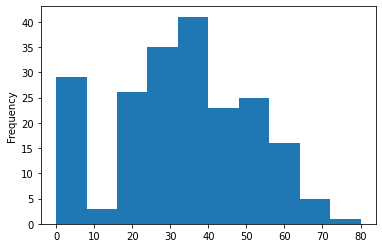

In [123]:
# Histograma da coluna "Age"
df_titanic["Age"].plot.hist()

Mas também podemos fazer um histograma de todas as colunas/features numéricas, teriamos era que permeiramente fazer um drop de cada feature não numérica.

Podemos mostrar as amostras com base em 2 colunas. Vamos fazer a "Fare" (y) em função da "Age" (x).

<AxesSubplot:xlabel='Age', ylabel='Fare'>

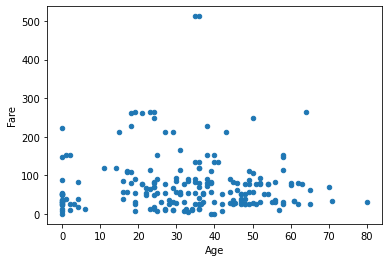

In [125]:
df_titanic.plot.scatter("Age", "Fare")

Tem várias coisa que dão para fazer, mas eu prefiro usar diretamente o Matplotlib e outra biblioteca que eu falarei depois.<br>
No entanto queria mostrar que o Pandas tem algumas funcionalidades gráficas já embutidas.

# Conclusão

Este capítulo em comparação ao de Numpy, foi mais prático devido ao Pandas ser mais para manipulação de Datasets do que propriamente para aplicação de matemática como acontece no Numpy.<br><br>
Queria recomendar um cursinho de Pandas que o <a href="https://www.twitch.tv/teomewhy">teomewhy</a> fez. Por vezes ajuda ver explicações de outras pessoas para entender certos conceitos, logo sem demoras clique <a href="https://github.com/TeoCalvo/PandasToTeo">aqui</a>.<br><br>
Lembro que ainda vamos ver mais coisas acerca do Pandas nos apontamentos de "Análise de Dados", mas estão todos à vontade para pedir para eu adicionar ou remover coisas daqui. Qualquer dúvida ou opinião podem mandar em alguma das minhas redes sociais (links abaixo) ou abram uma Issue aqui no Github.

# Contactos
[Twitter](https://twitter.com/iN127pkt)<br>
[Instagram](https://www.instagram.com/t_1g4_x/)<br>
[Email](tiagodeha@protonmail.com)<br>